In [1]:
import statsmodels.formula.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Data

In [18]:
df = pd.read_csv("../data/dc_bikes_new.csv",index_col=1,parse_dates=["datetime"])

df = df.drop(columns= ["Unnamed: 0"])
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day,part_of_day
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,0,1,5,night
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,1,1,5,night
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,2,1,5,night
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,3,1,5,night
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,4,1,5,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156,19,12,0,evening
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104,20,12,0,evening
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67,21,12,0,night


### Filtering Data

In [3]:
df = df[["temp",'atemp','humidity','windspeed','count']]

df

,temp,atemp,humidity,windspeed,count
datetime,,,,,
2011-01-01 00:00:00,9.84,14.395,81,0.0000,16
2011-01-01 01:00:00,9.02,13.635,80,0.0000,40
2011-01-01 02:00:00,9.02,13.635,80,0.0000,32
2011-01-01 03:00:00,9.84,14.395,75,0.0000,13
2011-01-01 04:00:00,9.84,14.395,75,0.0000,1
...,...,...,...,...,...
2012-12-31 19:00:00,10.66,12.880,60,11.0014,156
2012-12-31 20:00:00,10.66,12.880,60,11.0014,104
2012-12-31 21:00:00,10.66,12.880,60,11.0014,67


### Checking for correlation

In [4]:
df.corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.987672,-0.069881,-0.023125,0.414713
atemp,0.987672,1.000000,-0.051918,-0.062336,0.411854
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.329615
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.099909
count,0.414713,0.411854,-0.329615,0.099909,1.000000


### Visualising the correlation on a heatmap

<Axes: >

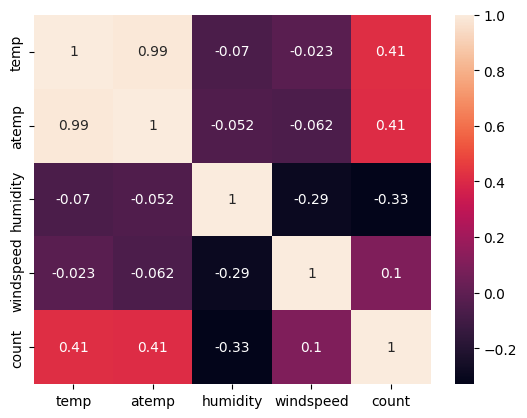

In [5]:
sns.heatmap(df.corr(),annot=True)

#### temp and atemp has the highest correlation with the count column

### testing models for fit

In [6]:
model1 = sm.ols(formula = "count ~ temp", data = df).fit() #between count and temp

In [7]:
model1.params

Intercept   -1.502696
temp         9.330142
dtype: float64

In [8]:
model1.rsquared_adj

0.17193951437174237

In [9]:
model2 = sm.ols(formula = "count ~ temp + humidity", data = df).fit() #between count and (temp,humidity)

In [10]:
model2.rsquared_adj

0.26272656761508595

#### R2 significantly improved

In [11]:
#between count and (temp,humidity,windspeed)

model3 = sm.ols(formula = "count ~ temp + humidity + windspeed", data = df).fit()

In [12]:
model3.rsquared_adj

0.26318377572413565

In [13]:
#between count and other paramteres
model4 = sm.ols(formula = "count ~ temp + humidity + windspeed +atemp", data = df).fit()

In [14]:
model4.rsquared_adj

0.2660961247219643

#### the model gets better when atemp is added. Actual Temperature can be a factor in people's affinity towards bike rental

In [15]:
df.corr(numeric_only=True)

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.987672,-0.069881,-0.023125,0.414713
atemp,0.987672,1.000000,-0.051918,-0.062336,0.411854
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.329615
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.099909
count,0.414713,0.411854,-0.329615,0.099909,1.000000


<Axes: >

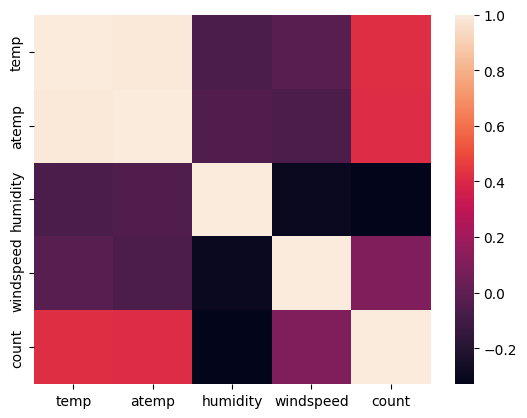

In [16]:
sns.heatmap(df.corr(numeric_only=True))

season can be an additional feature for improving the fit of the model 

### Model significantly improved with coupled up with part of day column

In [19]:
model5 = sm.ols(formula = "count ~ temp + humidity + windspeed +atemp + part_of_day", data = df).fit()

model5.rsquared_adj

0.4724175999169019